In [3]:
# In Class Lab 9 Template
# Cosmological Tools

In [19]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [20]:
# Define the benchmark cosmology at z =0
# Planck 2015 results. XIII. Cosmological parameters   
# Planck Collaboration+2016 A&A 594 13  Table 4, column 2 

OmegaM = 0.308   # Matter Density Parameter
OmegaR = 8.24e-5  # Radiation Density Parameter
OmegaL = 0.692  # Dark Energy Density Parameter
h = 0.6781   # Hubble Constant  100 h km/s/Mpc
        

In [33]:
class CosmologicalTools:
    # Define a class that provides functions to compute various cosmological quantities
    # for a given cosmology  
        
    def __init__(self, OmegaM, OmegaR, OmegaL, h):
        # initialize the instance of the class - for any given Cosmology
        # Input:    Omega M matter density parameter
        #           Omega R radiation density parameter
        #           Omega L  dark energy density parameter
        #           h  normalization for the hubble parameter
        
        # initialize the cosmology
        self.OmegaM = OmegaM # Matter Density Parameter
        self.OmegaR = OmegaR  # Radiation Density Parameter
        self.OmegaL = OmegaL  # Dark Energy Density Parameter
        self.OmegaK = 1.0 - (OmegaM + OmegaR + OmegaL) # Curvature Density Parameter
    
        self.h = h   # Normalization of Hubble Parameter   
        self.Ho = h*100*u.km/u.s/u.Mpc #  Hubble Constant at z=0  100 h km/s/Mpc
    
    
    # Question 1 A)
    def HubbleParameterZ(self, z):
        # Function that defines the Hubble Parameter as a function of redshift
        # Input:   Redshift z 
        # Returns: The Hubble parameter at the given redshift in units of km/s/Mpc        
        Hz = np.sqrt(self.Ho**2*(self.OmegaM*(1+z)**3 + self.OmegaR*(1+z)**4 + self.OmegaL + self.OmegaK*(1+z)**2))
        # FILL THIS IN 
        return Hz
    
    
    # Question 2 A)
    def OmegaM_Z(self,z):
        # Function that defines the matter density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Matter Density Parameter at the given redshift.
        OM = self.OmegaM*((1+z)**3)*(self.Ho/self.HubbleParameterZ(z))**2
        # FILL THIS IN
        return OM
    
    def OmegaR_Z(self,z):
        # Function that defines the radiation density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Radiation Density Parameter at the given redshift.
        OR = self.OmegaR*((1+z)**4)*(self.Ho/self.HubbleParameterZ(z))**2
        # FILL THIS IN
        return OR
    
    
    def OmegaL_Z(self,z):
        # Function that defines the dark energy density parameter as a function of redshift
        # Input:  Redshift z . Can be an array
        # Output:  Dark Energy Density Parameter at the given redshift.
        OL = self.OmegaL*(self.Ho/self.HubbleParameterZ(z))**2
        # FILL THIS IN
        return OL
    
    
    

In [34]:
# Define here an instance of the Class Cosmological Tools that follows the Benchmark Cosmology


In [35]:
# Question 1 B) 
Coso = CosmologicalTools(0.308, 8.24e-5, 0.692, 0.6781)
Hubb = Coso.HubbleParameterZ(0)

print(Hubb)
# Test Hubble Parmeter at z = 0


67.81 km / (Mpc s)


In [36]:
# Question 1 C) 
Hubb2 = Coso.HubbleParameterZ(1)

print(Hubb2)
# Compute the Hubble Parameter at z = 1 in BenchMark Cosmology


120.48424622291365 km / (Mpc s)


In [37]:
# Question 1 D) 
# Define the cosmology for the Einstein De Sitter Universe
OmegaMD = 1
OmegaRD = 0
OmegaLD = 0
# h is the same

# Define a New Instance of the Class with Einstein De Sitter Cosmology 
Coso2 = CosmologicalTools(OmegaMD, 0, 0, 0.6781)


# Compute the Hubble Parameter at z = 1.0 in Einstein De Sitter Cosmology
HubbD = Coso2.HubbleParameterZ(1)

print(HubbD)
print("Velocities are greater")


191.79564332903917 km / (Mpc s)
Velocities are greater


# Question 1 D) 
Is the recession velocity for a galaxy at a given distance expected to be larger or smaller in Einstein De Sitter vs the Benchmark cosmology at z=1?

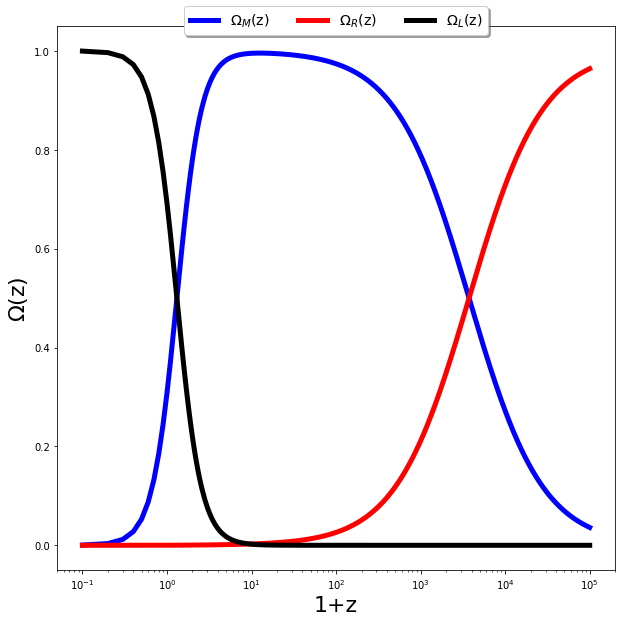

In [46]:
# Question 2 B) 




# Plot the Redshift Evolution of OmegaM, OmegaR and OmegaL
############################################################

fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111)

# Define an array of redshift 
zmax = 10**5
zmin = -0.9
zrange = np.arange(zmin, zmax, 0.1)

MDP = Coso.OmegaM_Z(zrange)
RDP = Coso.OmegaR_Z(zrange)
DEP = Coso.OmegaL_Z(zrange)

# Evolution of Matter Density Parameter as a function of 1+z
# FILL THIS IN
plt.semilogx( zrange+1 , MDP, color='blue', linewidth=5, label=r'$\Omega_M$(z)')

# Evolution of Radiation Density Parameter 
# FILL THIS IN 
plt.semilogx( zrange+1 , RDP, color='red', linewidth=5, label=r'$\Omega_R$(z)')

# Evolution of Dark Energy Density Parameter 
# FILL THIS IN
plt.semilogx( zrange+1 , DEP, color='black', linewidth=5, label=r'$\Omega_L$(z)')




# Add axis labels
plt.xlabel('1+z', fontsize=22)
plt.ylabel(r'$\Omega$(z)', fontsize=22)


#adjust tick label font size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size


legend = ax.legend(loc='upper center', fontsize='x-large', bbox_to_anchor=(0.5, 1.05),ncol=3, fancybox=True, shadow=True)

# Save to a file
ax.set_rasterized(True)
plt.savefig('DensityParameterEvolution.eps', rasterized=True, dpi=350)

# Question 2 C) 

 At what approximate redshift does Radiation Density dominate?

 

 At what approximate redshift does Dark Energy dominate?   

